# Predicting House Prices — Advanced Regression Techniques with XGBoost

Welcome to this notebook, where we’ll tackle predicting house prices in Ames, Iowa using the powerful **XGBRegressor**. The dataset comes from a popular Kaggle competition:  
[Predicting House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

This dataset is packed with detailed info on each home — from size and quality to year built — alongside their sale prices. Our mission? To predict those sale prices accurately. We’ll get a test set without prices and use our model to estimate those values.

Here’s the game plan:

- Explore the data with EDA to uncover feature relationships and patterns  
- Impute missing values smartly to handle incomplete data  
- Convert categorical features into machine-friendly one-hot vectors  
- Build a simple baseline model using the mean sale price for reference  
- Train an XGBRegressor and see how much it improves performance  
- Tune hyperparameters carefully to squeeze out better accuracy and reduce overfitting  

Let’s dive in and turn raw data into solid predictions!

In [2114]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error # Loss
from xgboost import XGBRegressor # Model
from sklearn.preprocessing import OneHotEncoder # Encoding
from sklearn.impute import SimpleImputer # Imputing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Splitting data
import seaborn as sns
import matplotlib
import plotly.express as px

matplotlib.rcParams['figure.figsize'] = (12,6) # Changing size of the graphs
sns.set_style('darkgrid')
%matplotlib inline

In [2115]:
# Loading datasets
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [2116]:
# Splitting data
X_train, X_val = train_test_split(X_train, test_size=0.1, random_state=42)

In [2117]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
907,908,50,RL,86.0,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,250000
782,783,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,187100
952,953,85,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,133900
620,621,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,67000
669,670,30,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,137500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950


In [2118]:
X_val

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,527,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,132000
101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
1092,1093,50,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,136500
411,412,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,145000


In [2119]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [2120]:
# Creating target series
X_train_target = X_train['SalePrice']
X_val_target = X_val['SalePrice']

# Dropping target column to match test set
X_train.drop('SalePrice', axis=1, inplace=True)
X_val.drop('SalePrice', axis=1, inplace=True)

In [2121]:
# Creating an test id series to use for submission later
test_id = X_test['Id']

In [2122]:
# Dropping Id column from all datasets because it could confuse the model
X_train.drop('Id', axis=1, inplace=True)
X_val.drop('Id', axis=1, inplace=True)
X_test.drop('Id', axis=1, inplace=True)

In [2123]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
907,50,RL,86.0,11500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,322,0,NaN,NaN,NaN,0,6,2006,WD,Normal
782,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
952,85,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal
620,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
669,30,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1130,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1294,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
860,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [2124]:
X_val

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal
1105,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
413,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
522,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
1036,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
101,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1092,50,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
411,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal


In [2125]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Exploratory Data Analysis (EDA)

Look for relationships between features and the target and look for outliers or skewed data. 
Use graphs, `describe()`, `info()` and more to find these relationships.
Watch out for NaN values for when we start imputing.

## Basic Inspection

In [2126]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
907,50,RL,86.0,11500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,322,0,NaN,NaN,NaN,0,6,2006,WD,Normal
782,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
952,85,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal
620,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
669,30,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal


In [2127]:
X_train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1095,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1130,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1294,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
860,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal
1126,120,RL,53.0,3684,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [2128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 907 to 1126
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1314 non-null   int64  
 1   MSZoning       1314 non-null   object 
 2   LotFrontage    1077 non-null   float64
 3   LotArea        1314 non-null   int64  
 4   Street         1314 non-null   object 
 5   Alley          86 non-null     object 
 6   LotShape       1314 non-null   object 
 7   LandContour    1314 non-null   object 
 8   Utilities      1314 non-null   object 
 9   LotConfig      1314 non-null   object 
 10  LandSlope      1314 non-null   object 
 11  Neighborhood   1314 non-null   object 
 12  Condition1     1314 non-null   object 
 13  Condition2     1314 non-null   object 
 14  BldgType       1314 non-null   object 
 15  HouseStyle     1314 non-null   object 
 16  OverallQual    1314 non-null   int64  
 17  OverallCond    1314 non-null   int64  
 18  YearBuilt  

In [2129]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1314.000000,1077.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1306.000000,1314.000000,1314.000000,...,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,57.431507,69.793872,10618.920091,6.107306,5.576865,1971.008371,1984.819635,103.800919,445.867580,43.351598,...,472.396499,94.875951,47.885084,22.132420,3.770928,15.258752,3.065449,46.677321,6.344749,2007.819635
std,42.510304,24.406605,10423.889109,1.373747,1.109653,30.462154,20.696263,177.101513,455.366534,155.291529,...,210.158719,126.785144,67.500696,61.865423,30.876730,56.303822,42.341109,522.035539,2.689126,1.334484
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7560.000000,5.000000,5.000000,1953.250000,1966.000000,0.000000,0.000000,0.000000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9549.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,387.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11622.750000,7.000000,6.000000,2001.000000,2004.000000,164.750000,719.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1127.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [2130]:
# Check for NaN
X_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      237
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [2131]:
# Check for NaN
X_val.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage      22
LotArea           0
Street            0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 79, dtype: int64

In [2132]:
# Check for NaN
X_test.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

## Target Variable Analysis

<Axes: xlabel='SalePrice', ylabel='Count'>

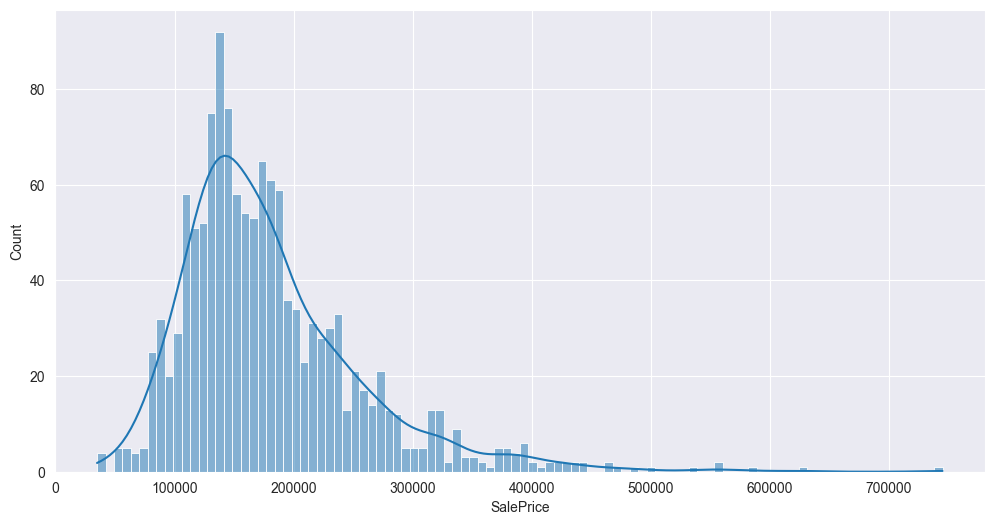

In [2133]:
# Target distribution
sns.histplot(
   X_train_target,
   bins=100,
   kde=True
)
# Conclusion: A gaussian (normal) distribution. The most common price seems to be around $140,000

In [2134]:
# Establish numerical and categorical columns
numeric_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(include='object').columns

In [2135]:
len(numeric_cols)

36

## Relationships and Correlations

In [2136]:
# Create a correlation matrix to make EDA easier (I have 36 numeric cols)

# Concatenate the numeric features and the target column
corr_df = pd.concat([X_train[numeric_cols], X_train_target], axis=1)

# Calculate correlation matrix and grab the correlation with SalePrice only
corr_with_target = corr_df.corr()["SalePrice"].drop("SalePrice").sort_values(ascending=False)

# Turn it into a dataframe (optional, for pretty display)
correlation_df = pd.DataFrame(corr_with_target).reset_index()
correlation_df.columns = ["Feature", "CorrelationWithSalePrice"]

In [2137]:
# Most influential
correlation_df.head(10)

,Feature,CorrelationWithSalePrice
0,OverallQual,0.789655
1,GrLivArea,0.698334
2,GarageCars,0.641310
3,GarageArea,0.622867
4,TotalBsmtSF,0.606483
5,1stFlrSF,0.596683
6,FullBath,0.558599
7,YearBuilt,0.526777
8,TotRmsAbvGrd,0.521483
9,YearRemodAdd,0.511338


<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

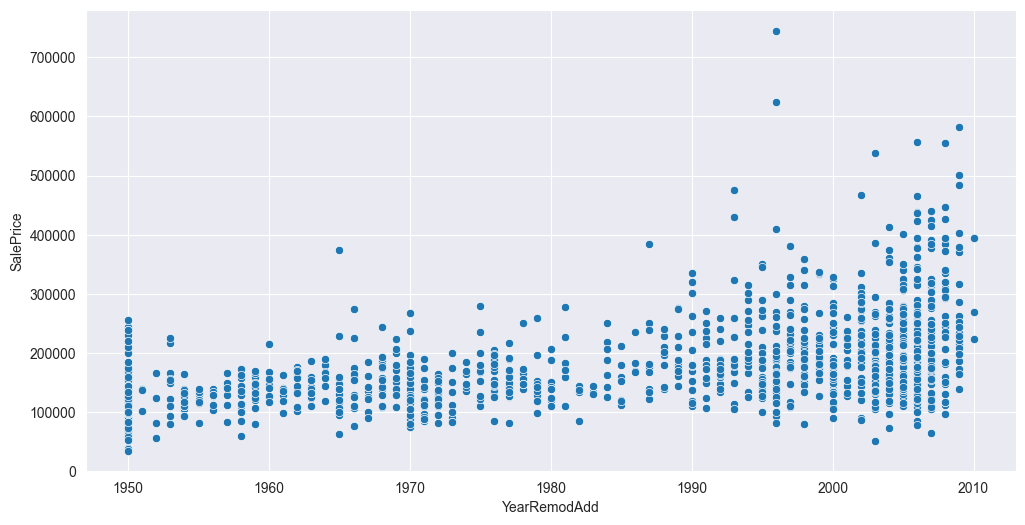

In [2138]:
# Plot YearRemodAdd against the SalePrice
sns.scatterplot(
    data=X_train,
    x='YearRemodAdd',
    y=X_train_target,
)
# A very defined cluster and linear relationship, the line is quite flat though
# If a house is recently rennovated, it is probably going to loom really good and end up being more expensive

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

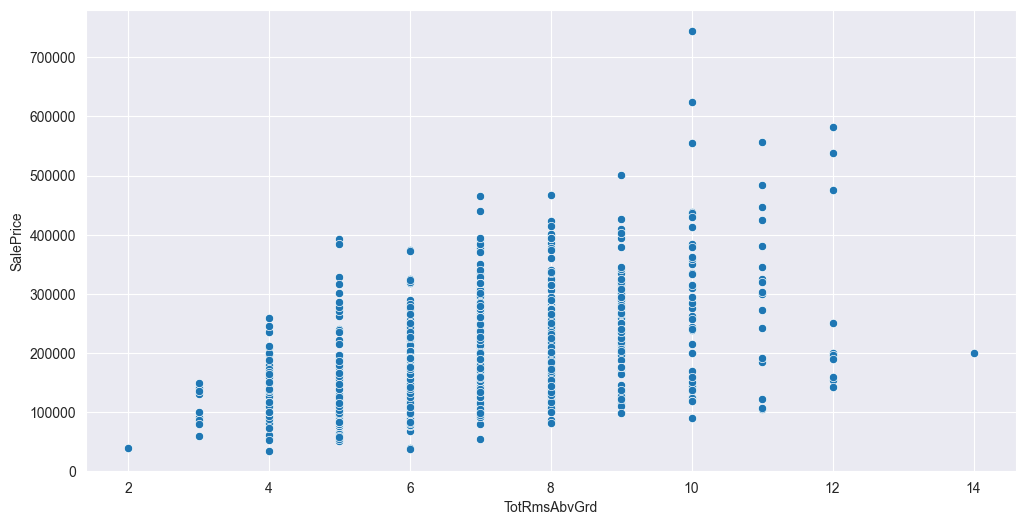

In [2139]:
# Plot TotRmsAbvGrd against the SalePrice
sns.scatterplot(
    data=X_train,
    x='TotRmsAbvGrd',
    y=X_train_target,
)
# A somewhat defined linear relationship here
# The more rooms above ground, the more space in the house, and the more space for eating, sleep, storage, and whatnot

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

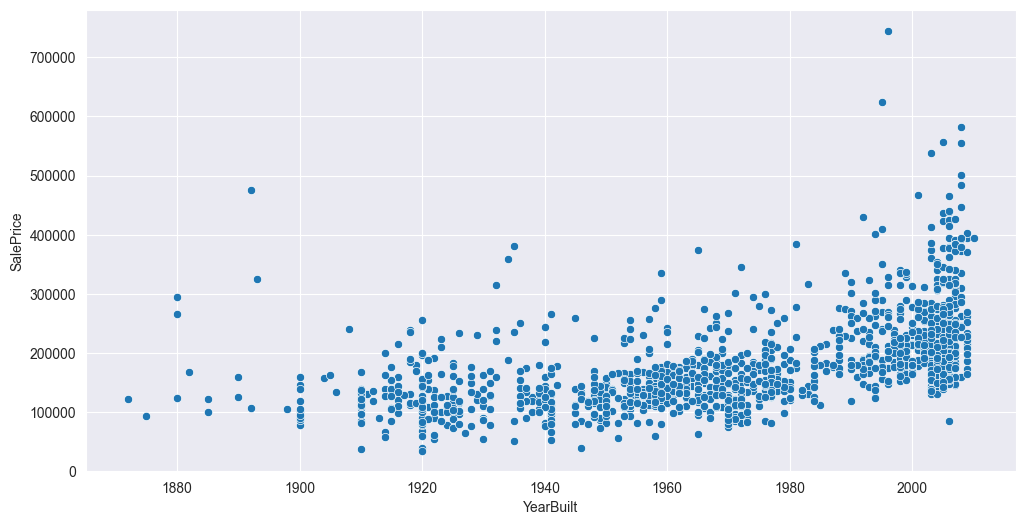

In [2140]:
# Plot YearBuilt against the SalePrice
sns.scatterplot(
    data=X_train,
    x='YearBuilt',
    y=X_train_target,
)
# A much flatter linear trend compared to the other ones
# It makes some sense though, more modern houses would attract richer customers, but some pople would also have tast in old, vintage houses

<Axes: xlabel='FullBath', ylabel='SalePrice'>

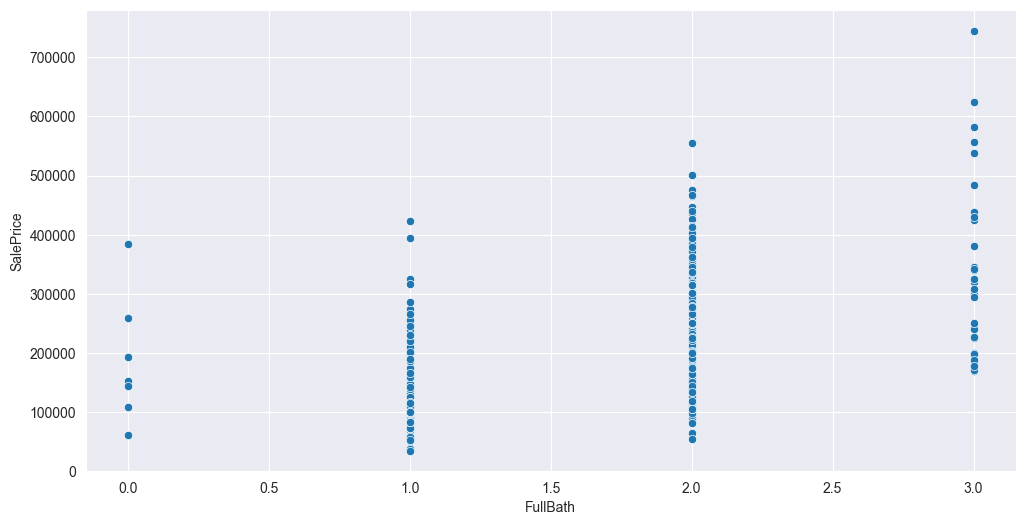

In [2141]:
# Plot FullBath against the SalePrice
sns.scatterplot(
    data=X_train,
    x='FullBath',
    y=X_train_target,
)
# Not much of a clear linear relationship, but we can see the higher full bath is, the higher the price
# Full bath is the amount of bathrooms above ground, and more bathrooms is a lot more convenient that just one

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

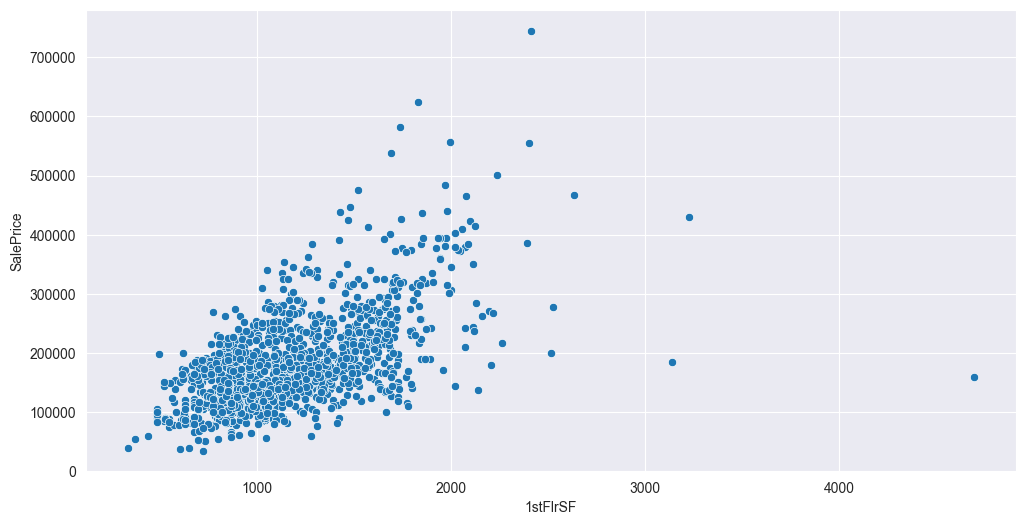

In [2142]:
# Plot 1stFlrSF against the SalePrice
sns.scatterplot(
    data=X_train,
    x='1stFlrSF',
    y=X_train_target,
)
# A clear linear relationship excluding a few outliers
# The first floor is tpyically where most of the living space is, so more living space can house more people, meaning the the overall house is probably large

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

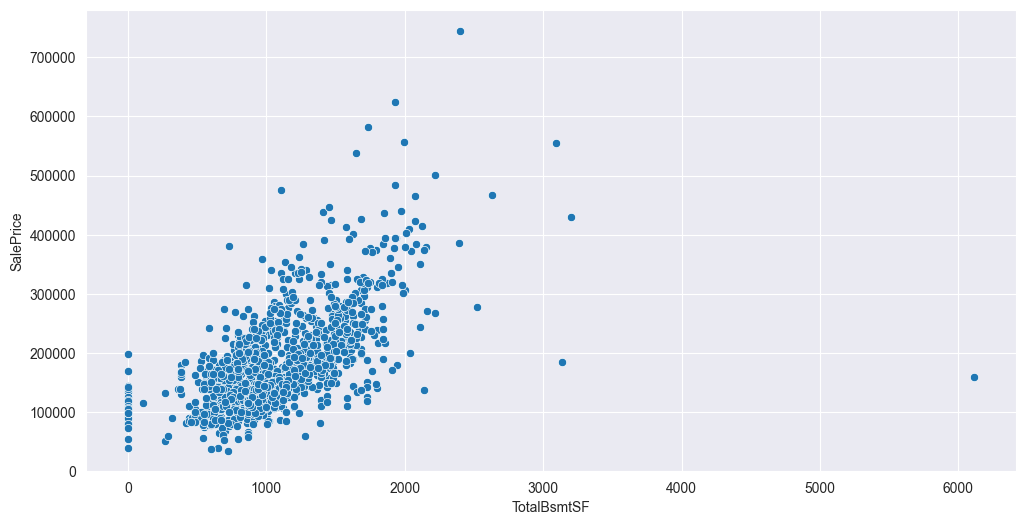

In [2143]:
# Plot TotalBsmtSF against the SalePrice
sns.scatterplot(
    data=X_train,
    x='TotalBsmtSF',
    y=X_train_target,
)
# A pretty clear linear relationship, but that one datapoint all the way to the right is looking a bit funky
# The more basement space, the more storage area, and this results in the higher price

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

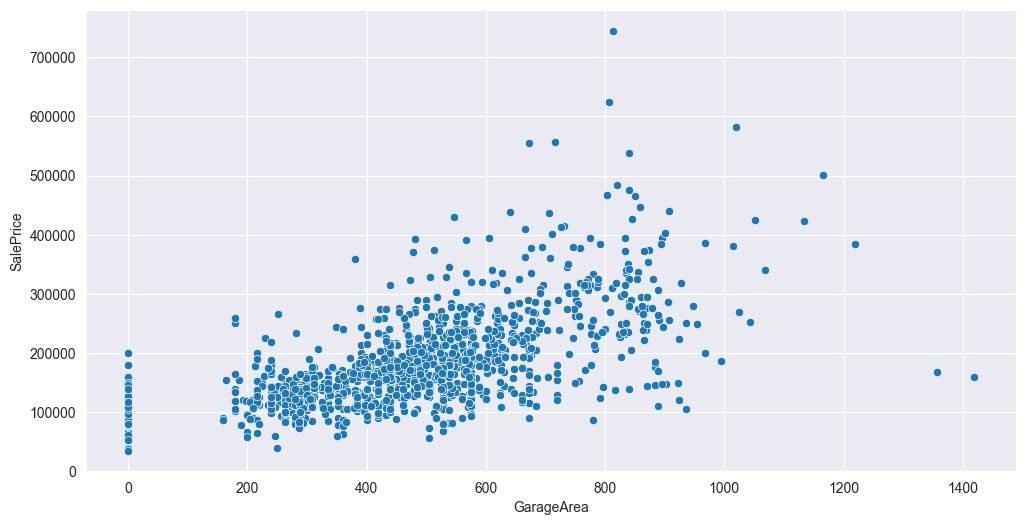

In [2144]:
# Plot GarageArea against the SalePrice
sns.scatterplot(
    data=X_train,
    x='GarageArea',
    y=X_train_target,
)
# We can see a small cluster of dots around zero, indicating that houses with not garages are also being sold for around 10,000 to 200,000
# Looking at the other data points though, we can see that there is some linear relationship with a few outliers
# More cars someone owns, the richer they will be, and the more garage space they need, and the more expensive the house is

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

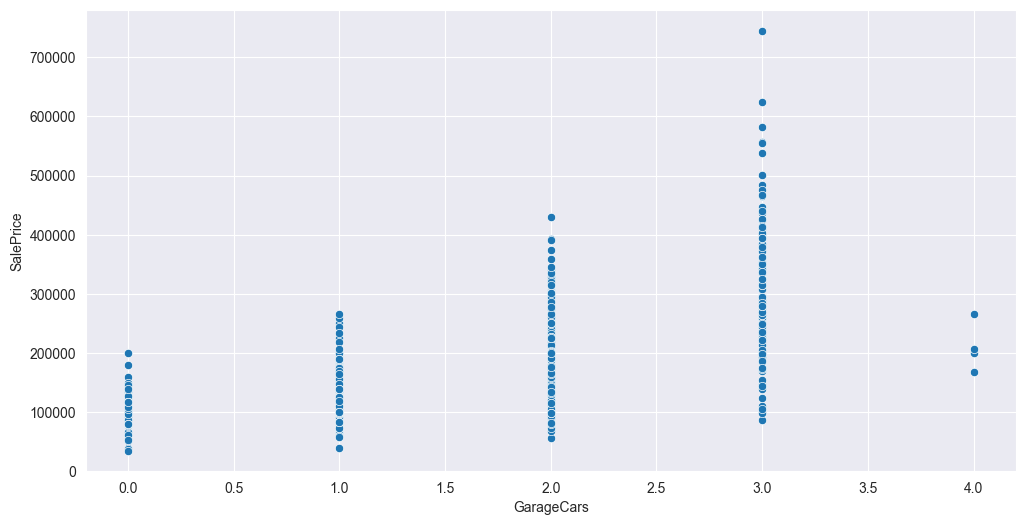

In [2145]:
# Plot GarageCars against the SalePrice
sns.scatterplot(
    data=X_train,
    x='GarageCars',
    y=X_train_target,
)
# Looks a bit weird, but we can definitley see a sort of linear relationship
# The more cars someone has, the more likely they are to be rich
# These people will be looking for houses with lots of car space and will thus be more expensive

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

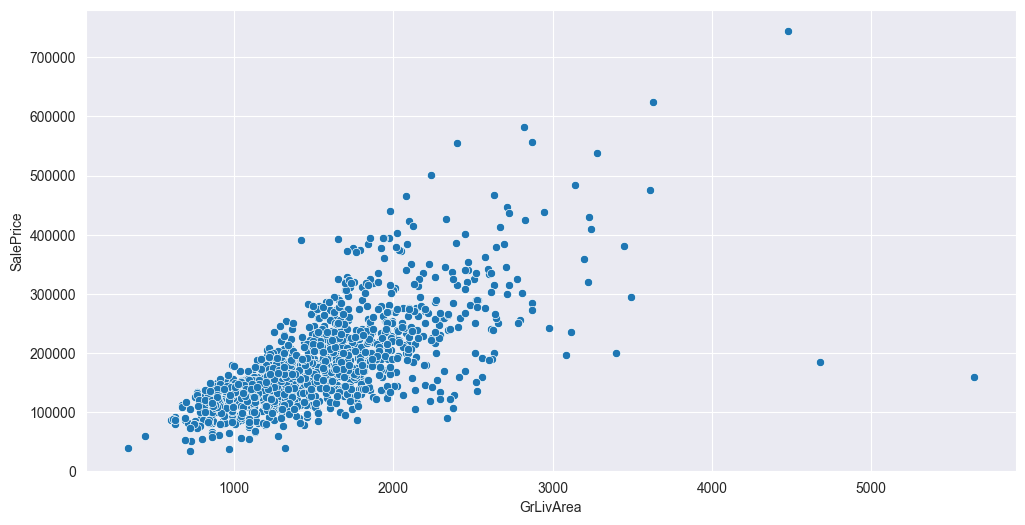

In [2146]:
# Plot GrLivArea against the SalePrice
sns.scatterplot(
    data=X_train,
    x='GrLivArea',
    y=X_train_target,
)
# A large cluster toward the bottom which seems to then branch out linearly, as the x increases, so does the y
# Makes sense because the GrLivArea is the area above ground (no basements/cellars), the more of this you have, the more living space, and thus, a higher price

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

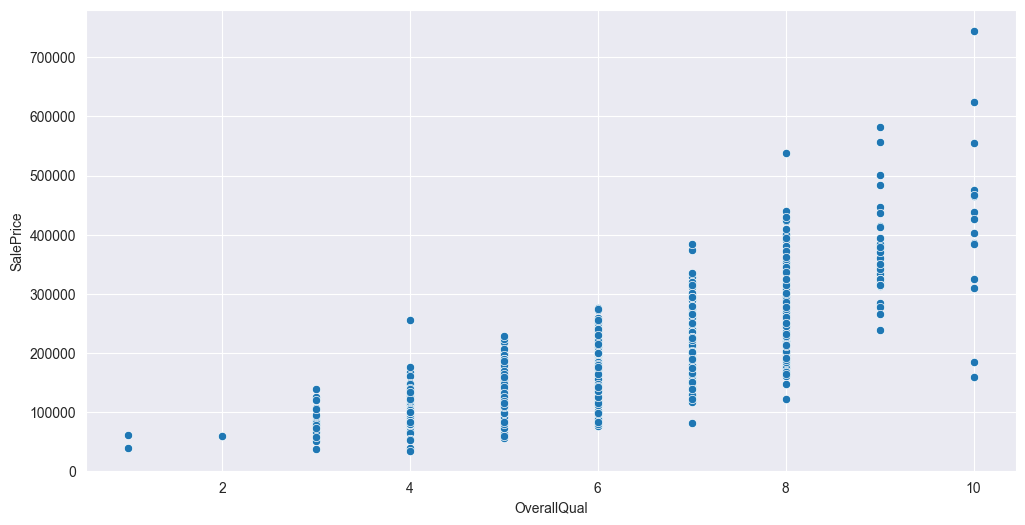

In [2147]:
# Plot OverallQual against the SalePrice
sns.scatterplot(
    data=X_train,
    x='OverallQual',
    y=X_train_target,
)
# We can see a sort of linear relationship between the quality and the price
# Makes a lot of sense because the overall quality of the house seems to be the biggest factor, why would you buy a house with bad quality?

## Feature Interactions

In [2148]:
X_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
907,50,RL,86.0,11500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,322,0,NaN,NaN,NaN,0,6,2006,WD,Normal
782,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
952,85,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal
620,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
669,30,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
128,60,RL,69.0,7590,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca
910,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Normal
998,30,RM,60.0,9786,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1450,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal


## Possible New Feature – Time Since Built

Older houses may experience deterioration or outdated designs, which can negatively impact sale price.  
To capture this relationship, we can engineer a new feature:

**`TimeSinceBuilt = YrSold - YearBuilt`**

The idea:  
The more time has passed since a house was built, the more likely its quality or market appeal has decreased — potentially lowering the sale price.

In [2149]:
X_train["TimeSinceBuilt"] = (X_train["YrSold"] - X_train["YearBuilt"]).clip(lower=0)
X_val["TimeSinceBuilt"] = (X_val["YrSold"] - X_val["YearBuilt"]).clip(lower=0)
X_test["TimeSinceBuilt"] = (X_test["YrSold"] - X_test["YearBuilt"]).clip(lower=0)

In [2150]:
X_train[X_train['TimeSinceBuilt'] < 0] # Checking for invalid dates

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TimeSinceBuilt


In [2151]:
X_val[X_val['TimeSinceBuilt'] < 0] # Checking for invalid dates

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TimeSinceBuilt


In [2152]:
X_test[X_test['TimeSinceBuilt'] < 0] # Checking for invalid dates

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TimeSinceBuilt


<Axes: xlabel='TimeSinceBuilt', ylabel='SalePrice'>

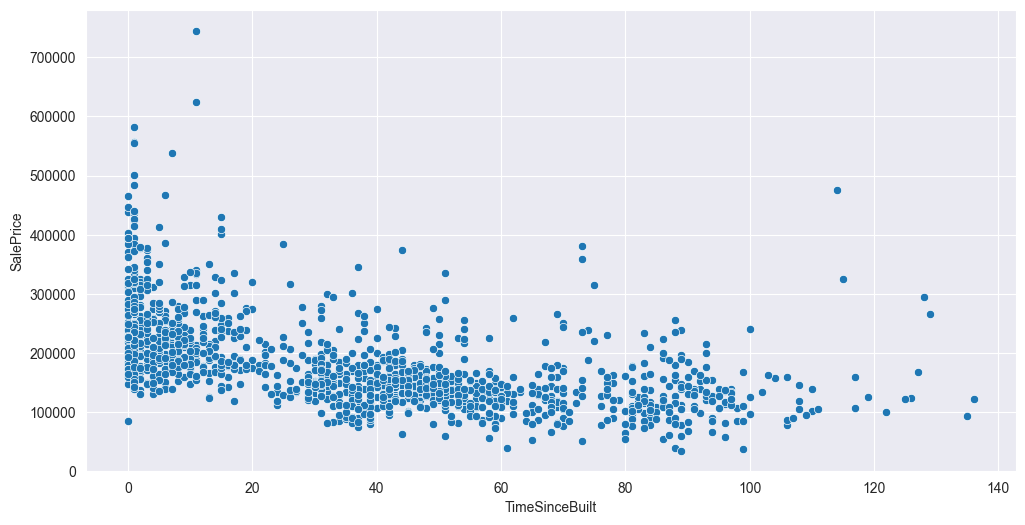

In [2153]:
# Mapping the linear relationship between the new engineered column and the target
sns.scatterplot(
    X_train,
    x='TimeSinceBuilt',
    y=X_train_target
)

## Possible New Feature – Overall Quality/Condition

Since the quality and the conditon of the house are very closely related. To capture the total value of the house, we can engineer this new feature:

**`OverallQualCond = OverallQual * OverallCond`**

The idea:  
The higher the quality and the condition, the higher the OverallQualCond will be. The condition and quality of the house are some very deciding factors when considering options. 

In [2154]:
X_train['OverallQualCond'] = X_train['OverallQual'] * X_train['OverallCond'] # Multiplying to get the OverallQualCond
X_val['OverallQualCond'] = X_val['OverallQual'] * X_val['OverallCond']
X_test['OverallQualCond'] = X_test['OverallQual'] * X_test['OverallCond']

In [2155]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TimeSinceBuilt,OverallQualCond
907,50,RL,86.0,11500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2006,WD,Normal,70,49
782,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2009,WD,Normal,8,35
952,85,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,4,2009,WD,Normal,37,40
620,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,94,9
669,30,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2006,WD,Normal,84,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,3,2007,WD,Normal,1,30
1130,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,12,2009,WD,Normal,81,12
1294,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2006,WD,Normal,51,35
860,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,GdPrv,NaN,0,6,2007,WD,Normal,89,56


In [2156]:
X_train_target

907     250000
782     187100
952     133900
620      67000
669     137500
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1314, dtype: int64

<Axes: xlabel='OverallQualCond', ylabel='SalePrice'>

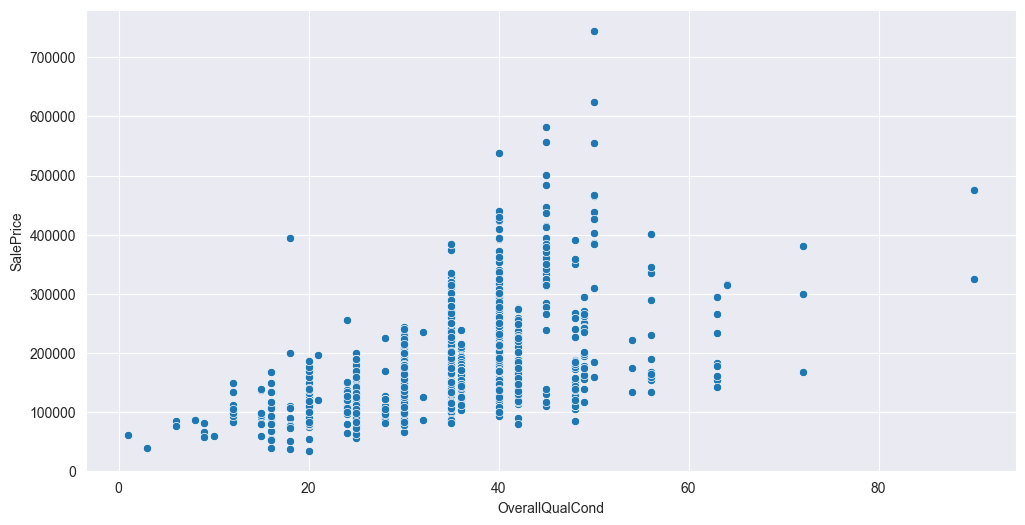

In [2157]:
# Mapping the linear relationship between the new engineered column and the target
sns.scatterplot(
    X_train,
    x='OverallQualCond',
    y=X_train_target
)

## Data Preprocessing and Cleaning

Now that we have analyzed the data, looked for outliers, engineered features, and visualized relationships, it's time to get the data ready for training. We're going to do this with 2 simple steps:

1. Impute NaN values
2. Encode categorical columns

## Impute NaN values

In [2158]:
numeric_cols = X_train.select_dtypes(include=np.number).columns # Redefining after adding new features

In [2159]:
imputer = SimpleImputer(copy=False).fit(X_train[numeric_cols]) # Create the imputer

In [2160]:
# Impute missing data
X_train[numeric_cols] = imputer.transform(X_train[numeric_cols])
X_val[numeric_cols] = imputer.transform(X_val[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

In [2161]:
np.sum(list(X_train[numeric_cols].isna().sum()))

np.int64(0)

In [2162]:
np.sum(list(X_val[numeric_cols].isna().sum()))

np.int64(0)

In [2163]:
np.sum(list(X_test[numeric_cols].isna().sum()))

np.int64(0)

## Encode Categorical Columns

In [2164]:
enc = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore').fit(X_train[categorical_cols])

In [2165]:
# Encode features into new array
X_train_encoded = enc.transform(X_train[categorical_cols])
X_val_encoded = enc.transform(X_val[categorical_cols])
X_test_encoded = enc.transform(X_test[categorical_cols])

# Get column names
encoded_col_names = enc.get_feature_names_out(categorical_cols)

# Cast to a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_col_names, index=X_train.index)
X_val_encoded_df   = pd.DataFrame(X_val_encoded,   columns=encoded_col_names, index=X_val.index)
X_test_encoded_df  = pd.DataFrame(X_test_encoded,  columns=encoded_col_names, index=X_test.index)

# Replace categorical columns with encoded ones
X_train = pd.concat([X_train[numeric_cols].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_val = pd.concat([X_val[numeric_cols].reset_index(drop=True), X_val_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test[numeric_cols].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [2166]:
np.sum(list(X_train.isna().sum()))

np.int64(0)

In [2167]:
np.sum(list(X_val.isna().sum()))

np.int64(0)

In [2168]:
np.sum(list(X_test.isna().sum()))

np.int64(0)

In [2169]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,50.0,86.0,11500.0,7.0,7.0,1936.0,1987.0,0.0,223.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,67.0,16285.0,7.0,5.0,2001.0,2002.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,85.0,60.0,7200.0,5.0,8.0,1972.0,2003.0,0.0,660.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30.0,45.0,8248.0,3.0,3.0,1914.0,1950.0,0.0,41.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30.0,80.0,11600.0,4.0,5.0,1922.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,20.0,78.0,9317.0,6.0,5.0,2006.0,2006.0,0.0,24.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1310,50.0,65.0,7804.0,4.0,3.0,1928.0,1950.0,0.0,622.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1311,20.0,60.0,8172.0,5.0,7.0,1955.0,1990.0,0.0,167.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1312,50.0,55.0,7642.0,7.0,8.0,1918.0,1998.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Training a Baseline Model

To really see how well our model is doing, we should try to compare it to a "dumb model". This one will simply just take the mean of the training sales price and output it. This model obviously is super unreliable, and using it in the real world would be a huge mistake. This means that if our trained model it worse than this one, something went SERIOUSLY wrong.

In [2170]:
# A baseline model to just take the mean of the training sale price
def baseline_mean_model(y_train, y_val):
    mean_val = np.mean(y_train)
    predictions = np.full(shape=len(y_val), fill_value=mean_val)
    rmse = root_mean_squared_error(y_val, predictions)
    return rmse

In [2171]:
rmse = baseline_mean_model(X_train, X_train_target)
print(f"Baseline RMSE: {rmse:.4f}")

Baseline RMSE: 196511.1148


## Training the XGBRegressor

After all this time, we can finally train our model using our engineered, cleaned, and analyzed data.

We'll start by making a helper function that will take the params we give it and give us the `rmse()` of the training and validation datasets.

In [2172]:
# RMSE function to calculate the loss
def rmse(a,b):
    return root_mean_squared_error(y_true=a,y_pred=b)

In [2173]:
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'TimeSinceBuilt', 'OverallQualCond'],
      dtype='object')

In [2174]:
X_train_target = np.log(X_train_target)
X_val_target = np.log(X_val_target)

X_train = X_train.copy()
X_val = X_val.copy()
X_test = X_test.copy()

for df in [X_train, X_val, X_test]:
    for col in numeric_cols:
        # Only apply log to strictly positive values to avoid NaNs or -inf
        df[col] = df[col].apply(lambda x: np.log(x) if x > 0 else 0)


def train_model(**params):
    """
    Trains a XGBRegressor model on the training dataset.

    Args:
    **params: Anything the XGBRegressor takes in as a parameters

    The XGBRegressor will already have a random_state=42, n_jobs=-1 (for all of the CPU cores to be used in parallel and maximize efficiency)

    Returns:
    A dictionary containg:

    The model
    The hyperparameters
    The training accuracy
    The validation accuracy
    """
    
    # Create and train model
    model = XGBRegressor(**params, n_jobs=-1, 
                         random_state=42, 
                         objective='reg:squarederror', 
                         eval_metric='rmse', )

    model.fit(X_train, 
              X_train_target, 
              verbose=True, 
              eval_set=[(X_val, X_val_target)])

    # Get predictions
    train_preds = np.exp(model.predict(X_train))
    val_preds = np.exp(model.predict(X_val))

    # Evaluate predictions
    train_acc = rmse(np.exp(X_train_target), train_preds)
    val_acc = rmse(np.exp(X_val_target), val_preds)


    print("\n\n\n\n\n\n\n\n")
    print(val_preds)
    print("\n\n\n\n\n\n")
    # Return results
    return {
        "model": model,
        "hyperparameters": params,
        "training acc": train_acc,
        "val acc"     : val_acc,
    }

In [2175]:
X_train.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 304, dtype: int64

In [2176]:
best_val_rmse = None

In [2177]:
base = train_model()
base_rsme = [base['training acc'], base['val acc']]
best_val_rmse = base['val acc']
base

[0]	validation_0-rmse:0.34452
[1]	validation_0-rmse:0.27174
[2]	validation_0-rmse:0.22602
[3]	validation_0-rmse:0.20082
[4]	validation_0-rmse:0.17824
[5]	validation_0-rmse:0.16019
[6]	validation_0-rmse:0.14777
[7]	validation_0-rmse:0.14330
[8]	validation_0-rmse:0.13902
[9]	validation_0-rmse:0.13611
[10]	validation_0-rmse:0.13352
[11]	validation_0-rmse:0.13094
[12]	validation_0-rmse:0.12840
[13]	validation_0-rmse:0.12812
[14]	validation_0-rmse:0.12762
[15]	validation_0-rmse:0.12677
[16]	validation_0-rmse:0.12634
[17]	validation_0-rmse:0.12589
[18]	validation_0-rmse:0.12654
[19]	validation_0-rmse:0.12639
[20]	validation_0-rmse:0.12646
[21]	validation_0-rmse:0.12615
[22]	validation_0-rmse:0.12617
[23]	validation_0-rmse:0.12562
[24]	validation_0-rmse:0.12605
[25]	validation_0-rmse:0.12597
[26]	validation_0-rmse:0.12589
[27]	validation_0-rmse:0.12592
[28]	validation_0-rmse:0.12582
[29]	validation_0-rmse:0.12559
[30]	validation_0-rmse:0.12549
[31]	validation_0-rmse:0.12584
[32]	validation_0-

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...),
 'hyperparameters': {},
 'training acc': 1168.4081697509348,
 'val acc': 27442.678868765557}

## Tuning Hyperparameters

We have a problem. After training our model with no adjusted hyperparams (tree based models are big on that), we get a training accuracy of 1,331 which is amazing, but 25,423 on the validation, which is textbook overfitting. Our model is memorizing training samples instead of generalizing.

In [2178]:
result = train_model(n_estimators=300)
best_rmse = result['val acc']
final_model = result['model']
result

[0]	validation_0-rmse:0.34452
[1]	validation_0-rmse:0.27174
[2]	validation_0-rmse:0.22602
[3]	validation_0-rmse:0.20082
[4]	validation_0-rmse:0.17824
[5]	validation_0-rmse:0.16019
[6]	validation_0-rmse:0.14777
[7]	validation_0-rmse:0.14330
[8]	validation_0-rmse:0.13902
[9]	validation_0-rmse:0.13611
[10]	validation_0-rmse:0.13352
[11]	validation_0-rmse:0.13094
[12]	validation_0-rmse:0.12840
[13]	validation_0-rmse:0.12812
[14]	validation_0-rmse:0.12762
[15]	validation_0-rmse:0.12677
[16]	validation_0-rmse:0.12634
[17]	validation_0-rmse:0.12589
[18]	validation_0-rmse:0.12654
[19]	validation_0-rmse:0.12639
[20]	validation_0-rmse:0.12646
[21]	validation_0-rmse:0.12615
[22]	validation_0-rmse:0.12617
[23]	validation_0-rmse:0.12562
[24]	validation_0-rmse:0.12605
[25]	validation_0-rmse:0.12597
[26]	validation_0-rmse:0.12589
[27]	validation_0-rmse:0.12592
[28]	validation_0-rmse:0.12582
[29]	validation_0-rmse:0.12559
[30]	validation_0-rmse:0.12549
[31]	validation_0-rmse:0.12584
[32]	validation_0-

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...),
 'hyperparameters': {'n_estimators': 300},
 'training acc': 208.48203010412414,
 'val acc': 27366.179249846064}

After changing our n_estimators to `n_estimators=300`, we see that the validation loss is still the same, but the training loss is 36, which is insane. Our model is massively overfitting. This leads me to believe that the problem is with the max depth of our trees. Reducing it would have our model learn less complex training patterns, allowing it to generalize better.

In [2179]:
base_rsme

[1168.4081697509348, 27442.678868765557]

In [2180]:
best_rmse

27366.179249846064

In [2190]:
%%time
result = train_model(
    n_estimators=10000,
    max_depth=7,
    early_stopping_rounds=300,
)

best_rmse = result['val acc']
final_model = result['model']
result

[0]	validation_0-rmse:0.34937
[1]	validation_0-rmse:0.27675
[2]	validation_0-rmse:0.22973
[3]	validation_0-rmse:0.19554
[4]	validation_0-rmse:0.17534
[5]	validation_0-rmse:0.16286
[6]	validation_0-rmse:0.15127
[7]	validation_0-rmse:0.14499
[8]	validation_0-rmse:0.13765
[9]	validation_0-rmse:0.13449
[10]	validation_0-rmse:0.13192
[11]	validation_0-rmse:0.13103
[12]	validation_0-rmse:0.12967
[13]	validation_0-rmse:0.12789
[14]	validation_0-rmse:0.12607
[15]	validation_0-rmse:0.12549
[16]	validation_0-rmse:0.12539
[17]	validation_0-rmse:0.12479
[18]	validation_0-rmse:0.12365
[19]	validation_0-rmse:0.12372
[20]	validation_0-rmse:0.12401
[21]	validation_0-rmse:0.12418
[22]	validation_0-rmse:0.12425
[23]	validation_0-rmse:0.12404
[24]	validation_0-rmse:0.12418
[25]	validation_0-rmse:0.12446
[26]	validation_0-rmse:0.12452
[27]	validation_0-rmse:0.12460
[28]	validation_0-rmse:0.12471
[29]	validation_0-rmse:0.12458
[30]	validation_0-rmse:0.12477
[31]	validation_0-rmse:0.12461
[32]	validation_0-

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=300,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10000,
              n_jobs=-1, num_parallel_tree=None, ...),
 'hyperparameters': {'n_estimators': 10000,
  'max_depth': 7,
  'early_stopping_rounds': 300},
 'training acc': 5739.456892719353,
 'val acc': 26673.40539163974}

(array([  4.,  10.,  48., 156., 419., 367., 210.,  78.,  17.,   5.]),
 array([10.46024211, 10.76633185, 11.07242159, 11.37851132, 11.68460106,
        11.9906908 , 12.29678054, 12.60287028, 12.90896002, 13.21504976,
        13.5211395 ]),
 <BarContainer object of 10 artists>)

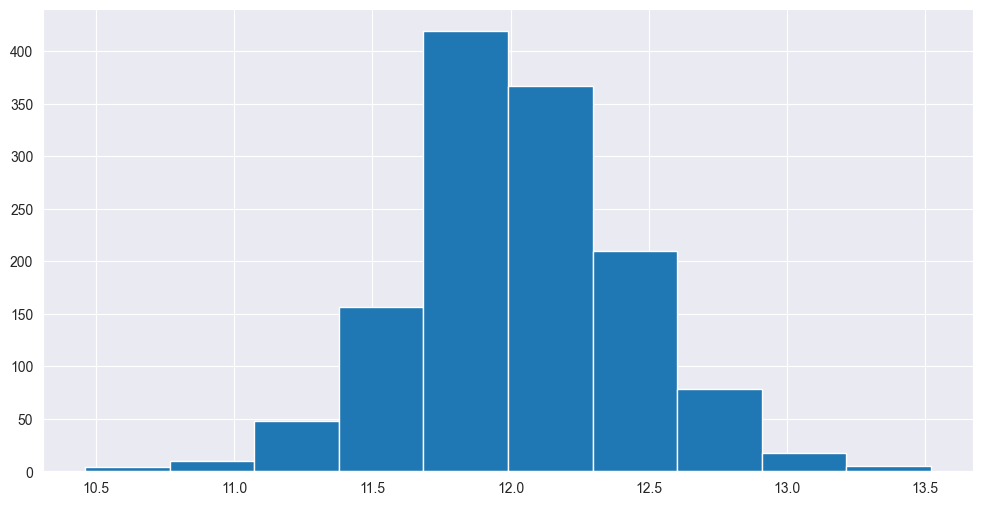

In [2182]:
plt.hist(X_train_target)

In [2183]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.995732,4.382027,9.360655,1.609438,1.791759,7.581210,7.581210,0.000000,6.148468,4.969813,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.995732,4.394449,9.565704,1.791759,1.791759,7.579679,7.579679,4.682131,6.827629,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.094345,4.304065,9.534595,1.609438,1.609438,7.599401,7.599902,0.000000,6.673298,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.094345,4.356709,9.208138,1.791759,1.791759,7.599902,7.599902,2.995732,6.400257,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.787492,3.761200,8.518193,2.079442,1.609438,7.596894,7.596894,0.000000,5.572154,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.075174,3.044522,7.568379,1.386294,1.945910,7.585789,7.585789,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,5.075174,3.044522,7.546446,1.386294,1.609438,7.585789,7.585789,0.000000,5.529429,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,2.995732,5.075174,9.903488,1.609438,1.945910,7.580700,7.598900,0.000000,7.109879,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,4.442651,4.127134,9.253496,1.609438,1.609438,7.596894,7.596894,0.000000,5.820083,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# TIME TO SUBMIT

In [2184]:
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [2185]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.995732,4.382027,9.360655,1.609438,1.791759,7.581210,7.581210,0.000000,6.148468,4.969813,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.995732,4.394449,9.565704,1.791759,1.791759,7.579679,7.579679,4.682131,6.827629,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.094345,4.304065,9.534595,1.609438,1.609438,7.599401,7.599902,0.000000,6.673298,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.094345,4.356709,9.208138,1.791759,1.791759,7.599902,7.599902,2.995732,6.400257,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.787492,3.761200,8.518193,2.079442,1.609438,7.596894,7.596894,0.000000,5.572154,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [2186]:
test_preds_log = final_model.predict(X_test)
test_preds = np.exp(test_preds_log)

submission = pd.DataFrame({
    'Id': test_id,
    'SalePrice': test_preds
})
submission.to_csv('submission.csv', index=False)

In [2189]:
(X_train.shape[0] + X_val.shape[0] + X_test.shape[0] ), (X_train.shape[1] + X_val.shape[1] + X_test.shape[1] )

(2919, 912)